In [1]:
import sleap_io as sio
from behavior_utils import *

In [37]:
root_path = 'd:/data/clickbait-motivate'

# Get paths to relevant files
slp_paths = get_file_paths(f"{root_path}", 'slp', '', session_type='', print_paths=True, print_n=np.inf)

Found 73 .slp files
0 d:\data\clickbait-motivate\bonsai\7010\m1\10082025_7010_m1.predictions.slp
1 d:\data\clickbait-motivate\bonsai\7010\m2\10092025_7010_m2.predictions.slp
2 d:\data\clickbait-motivate\bonsai\7010\m4\10132025_7010_m4.predictions.slp
3 d:\data\clickbait-motivate\bonsai\7010\m5\10142025_7010_m5.predictions.slp
4 d:\data\clickbait-motivate\bonsai\7010\m6\10152025_7010_m6.predictions.slp
5 d:\data\clickbait-motivate\bonsai\7010\m7\10162025_7010_m7.predictions.slp
6 d:\data\clickbait-motivate\bonsai\7010\m8\10182025_7010_m8.predictions.slp
7 d:\data\clickbait-motivate\bonsai\7010\m9\10192025_7010_m9.predictions.slp
8 d:\data\clickbait-motivate\bonsai\7010\m10\10202025_7010_m10.predictions.slp
9 d:\data\clickbait-motivate\bonsai\7010\m11\10212025_7010_m11.predictions.slp
10 d:\data\clickbait-motivate\bonsai\7010\m12\10222025_7010_m12.predictions.slp
11 d:\data\clickbait-motivate\bonsai\7010\m13\10242025_7010_m13.predictions.slp
12 d:\data\clickbait-motivate\bonsai\7010\m14\

In [4]:
# Make CSV builder function
# get skeleton names, use as headers, populate with points 
print(f"{slp.skeleton}\n")
print(f"{slp.labeled_frames[0].instances[0].points}\n")
print(f"{slp.labeled_frames[0].instances[0].points[1][0][0]}\n")

Skeleton(nodes=["nose", "centroid", "tailbase"], edges=[(0, 1), (1, 2)])

[([ 831.25109863, 1571.60144043], 0.69142556,  True, False, 'nose')
 ([ 700.46325684, 1612.51379395], 0.95628059,  True, False, 'centroid')
 ([ 576.29748535, 1663.85168457], 0.97842616,  True, False, 'tailbase')]

700.4632568359375



In [ ]:
81299

81299

In [8]:
len(slp.labeled_frames)

81207

In [18]:
full_length = set(range(slp.labeled_frames[0].video.shape[0]))
slp_length = set([frame.frame_idx for frame in slp.labeled_frames])
missing_frames = full_length - slp_length
print(missing_frames)

{33793, 33794, 33795, 33796, 33800, 22098, 64596, 22101, 64597, 64598, 64599, 60505, 7774, 7776, 7777, 7782, 7783, 19570, 19571, 19572, 19573, 19574, 19575, 20613, 38056, 20668, 20669, 20670, 20671, 20672, 20673, 9932, 20692, 20693, 20699, 19683, 19684, 19685, 63280, 63281, 63282, 63283, 63284, 63285, 51540, 51541, 51542, 4969, 52600, 52601, 4989, 62846, 62847, 62851, 62852, 62856, 62857, 42398, 42400, 33767, 63395, 63396, 63397, 63398, 33768, 53693, 53694, 53695, 33752, 33757, 6622, 6623, 6624, 6625, 33758, 33765, 33766, 6629, 6630, 33769, 33770, 33771, 6631, 6632, 6633, 6634, 6635, 6636, 33782, 33783, 33784, 33785}


In [40]:
for slp_path in slp_paths:
    slp = sio.load_file(f"{slp_path}")

    mouse_id = slp_path.parts[-3]
    session_id = slp_path.parts[-2]

    # Check which frames are missing from SLEAP inference
    full_length = set(range(slp.labeled_frames[0].video.shape[0]))
    slp_length = set([frame.frame_idx for frame in slp.labeled_frames])
    missing_slp_frames = full_length - slp_length

    # Extract node names for df column names
    sleap_cols = []
    for node in slp.skeleton.nodes:
        sleap_cols.append(f"{node.name}_x")
        sleap_cols.append(f"{node.name}_y")

    # Initialize df
    sleap_coords = pd.DataFrame(np.nan, index=range(slp.labeled_frames[0].video.shape[0]), columns=sleap_cols)
    
    # Populate df
    for frame in slp.labeled_frames:
        for kk, node in enumerate(slp.skeleton.nodes):
            sleap_coords.at[frame.frame_idx, f'{node.name}_x'] = (frame.instances[0].points[kk][0][0])
            sleap_coords.at[frame.frame_idx, f'{node.name}_y'] = (frame.instances[0].points[kk][0][1])

    # Interpolate missing values
    sleap_coords = sleap_coords.interpolate().ffill().bfill()

    # Save csv
    sleap_coords.to_csv(f"{slp_path.parent}/{mouse_id}_{session_id}_slp.csv")
    print(f"Saved SLEAP CSV for {mouse_id}-{session_id} at {slp_path.parent}/{mouse_id}_{session_id}_slp.csv")

Saved SLEAP CSV for 7010-m1 at d:\data\clickbait-motivate\bonsai\7010\m1/7010_m1_slp.csv
Saved SLEAP CSV for 7010-m2 at d:\data\clickbait-motivate\bonsai\7010\m2/7010_m2_slp.csv
Saved SLEAP CSV for 7010-m4 at d:\data\clickbait-motivate\bonsai\7010\m4/7010_m4_slp.csv
Saved SLEAP CSV for 7010-m5 at d:\data\clickbait-motivate\bonsai\7010\m5/7010_m5_slp.csv
Saved SLEAP CSV for 7010-m6 at d:\data\clickbait-motivate\bonsai\7010\m6/7010_m6_slp.csv
Saved SLEAP CSV for 7010-m7 at d:\data\clickbait-motivate\bonsai\7010\m7/7010_m7_slp.csv
Saved SLEAP CSV for 7010-m8 at d:\data\clickbait-motivate\bonsai\7010\m8/7010_m8_slp.csv
Saved SLEAP CSV for 7010-m9 at d:\data\clickbait-motivate\bonsai\7010\m9/7010_m9_slp.csv
Saved SLEAP CSV for 7010-m10 at d:\data\clickbait-motivate\bonsai\7010\m10/7010_m10_slp.csv
Saved SLEAP CSV for 7010-m11 at d:\data\clickbait-motivate\bonsai\7010\m11/7010_m11_slp.csv
Saved SLEAP CSV for 7010-m12 at d:\data\clickbait-motivate\bonsai\7010\m12/7010_m12_slp.csv
Saved SLEAP 

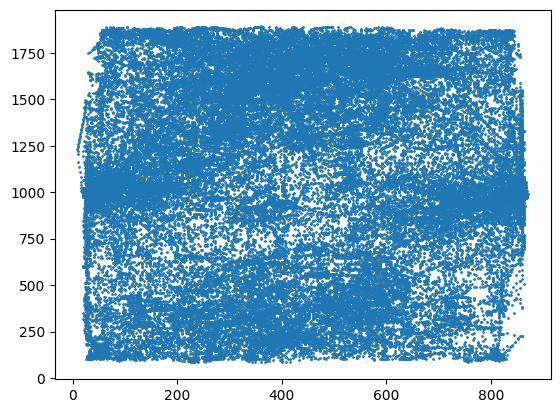

In [34]:
import matplotlib.pyplot as plt
test = pd.read_csv(f"{slp_path.parent}/{mouse_id}_{session_id}_slp.csv")
plt.scatter(test['nose_x'], test['nose_y'], s=1, alpha=1)

In [35]:
test.head()

,Unnamed: 0,nose_x,nose_y,centroid_x,centroid_y,tailbase_x,tailbase_y
0,0,831.251099,1571.601440,700.463257,1612.513794,576.297485,1663.851685
1,1,828.051697,1576.506958,703.656128,1615.532471,580.393494,1660.097168
2,2,823.443604,1583.814697,711.731567,1615.584473,591.678284,1664.136719
3,3,820.972839,1671.992798,703.583679,1635.639893,596.426270,1659.802612
4,4,818.362427,1662.412842,712.142029,1624.553467,608.605896,1655.583130
